In [1]:
# !pip install -r requirements.txt

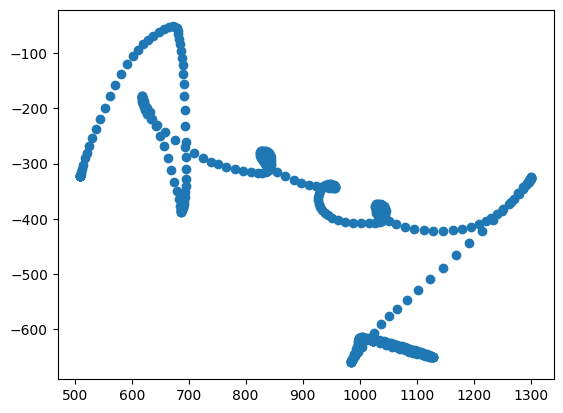

In [2]:
import numpy as np
import json

from plotting import *

from preprocess import preprocess

with open("data/signatures.txt") as f:
	signatures = json.load(f)
	np_signatures = np.array(signatures)

signals = [preprocess(np_signature) for np_signature in np_signatures]
plot_signals(signals)

signal = signals[0]

In [3]:
# !pip install --upgrade scipy==1.8.0
import scipy
print(scipy.__version__) # 1.8.0

1.8.0


In [4]:
print(len(signal.position),len(signal.velocity))

350 349


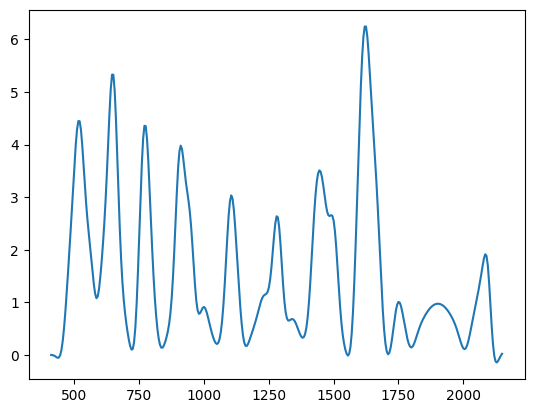

In [5]:
import matplotlib.pyplot as plt

plt.plot(signal.time[:-1],signal.speed)

['Point(role=2,idx=16,time=490.0,speed=2.768496621511224,angle=5.0749241828999345)', 'Point(role=3,idx=21,time=515.0,speed=4.44656779937629,angle=5.191876694965923)']
['Point(role=1,idx=5,time=435.0,speed=-0.05294560769028327,angle=2.0534034178982967)', 'Point(role=2,idx=16,time=490.0,speed=2.768496621511224,angle=5.0749241828999345)', 'Point(role=3,idx=21,time=515.0,speed=4.44656779937629,angle=5.191876694965923)', 'Point(role=4,idx=25,time=535.0,speed=3.623188411581674,angle=5.296008280234382)', 'Point(role=5,idx=35,time=585.0,speed=1.0791723985373316,angle=7.005233558991913)']
LognormalStroke(D=279.22031253021714,t_0=49.77380276992045,mu=6.145414947705504,sigma=0.05377001709498972,theta_s=5.02317812330771,theta_f=5.375691609703524)


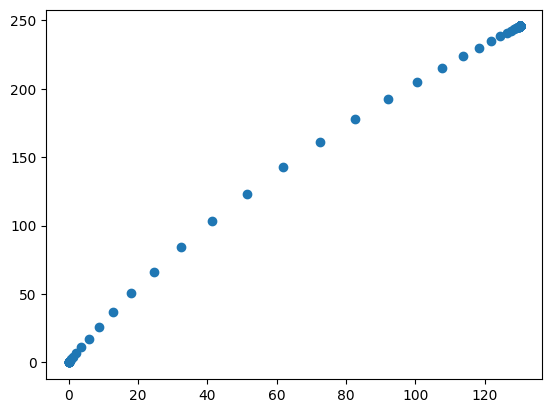

In [6]:
from speed_extract import extract_sigma_lognormal, get_point_combos, get_stroke_combos, mark_stroke_candidates

candidates=mark_stroke_candidates(signal)

candidate=candidates[0]
point_combos=get_point_combos(candidate)
point_combo = point_combos[0]
print([str(pt) for pt in point_combo])

stroke_combos = get_stroke_combos(candidate)
stroke_combo = stroke_combos[0]
print([str(pt) for pt in stroke_combo])

lognormal = extract_sigma_lognormal(point_combo,stroke_combo)
print(lognormal)
plot_signals([lognormal.signal(signal.time)])

In [7]:
np.array(1)/0

inf

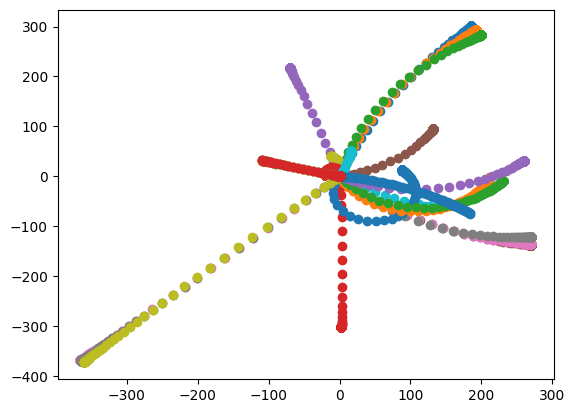

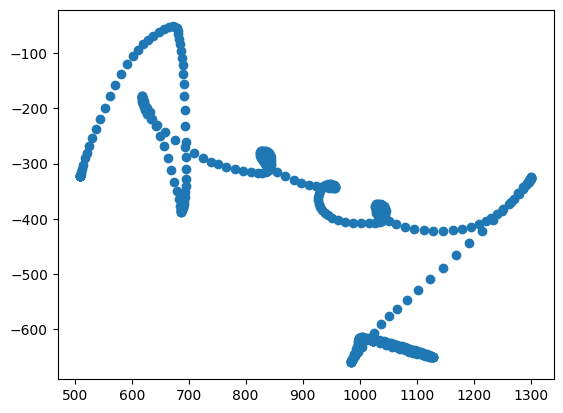

In [8]:
from speed_extract import extract_all_lognormals


lognormals = extract_all_lognormals(signal)

plot_signals([lgn.signal(signal.time) for lgn in lognormals])
plot_signals([signal])

In [9]:
from beam_search import BeamSearch
from action_plan import ActionPlan

top_k = 2
snr_threshold = 25
max_strokes = 25
search = BeamSearch(signal,top_k,snr_threshold,max_strokes)

demo_plan = ActionPlan([],signal.position[0])

suggest_plans = search.get_next_action_plans([demo_plan])


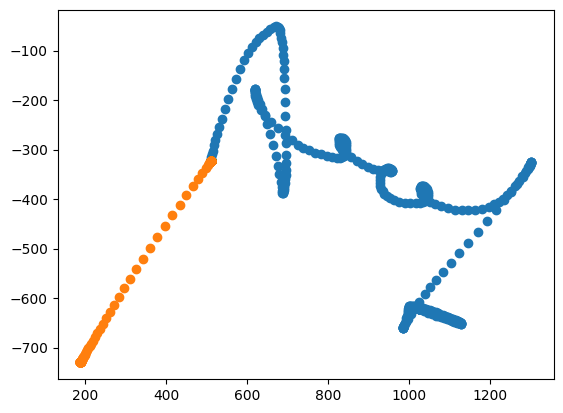

In [10]:
suggest_plan = suggest_plans[0]
plot_signals([signal,suggest_plan.signal(signal.time)])

In [11]:
out_plan,snr_plot = search.search()
out_signal = out_plan.signal(signal.time)

 96%|█████████▌| 24/25 [00:21<00:00,  1.12it/s]


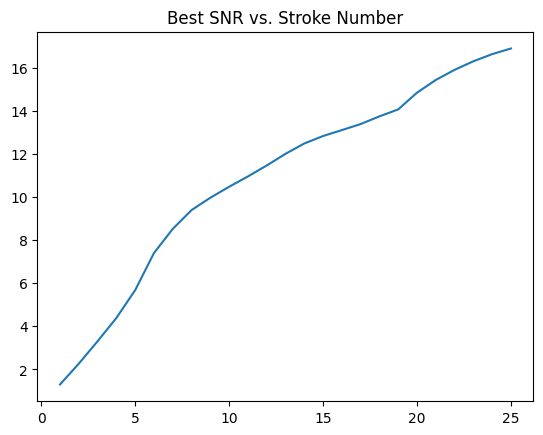

In [12]:
plt.plot(np.arange(1,1+len(snr_plot)),snr_plot)
plt.title("Best SNR vs. Stroke Number")
plt.show()

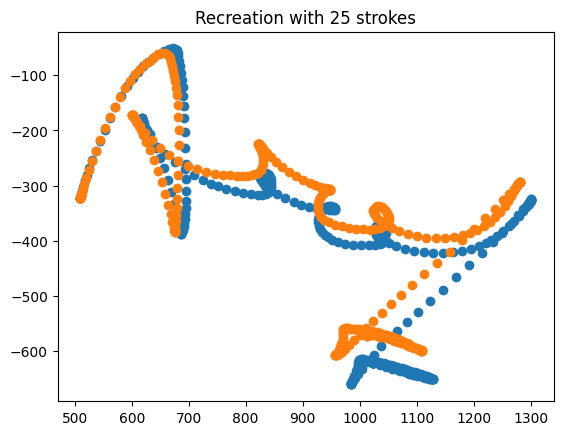

In [13]:
small_plan = out_plan#.sub_plan(18)
plt.title("Recreation with "+str(len(small_plan.strokes))+" strokes")
plot_signals([signal,small_plan.signal(signal.time)])

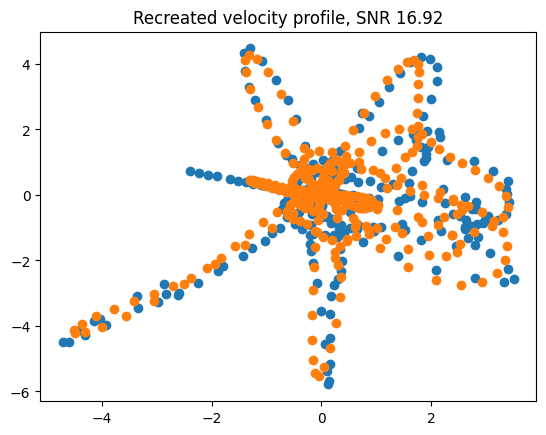

In [14]:
plt.title("Recreated velocity profile, SNR "+str(round(snr_plot[-1],2)))
plot_velocities([signal,out_signal])

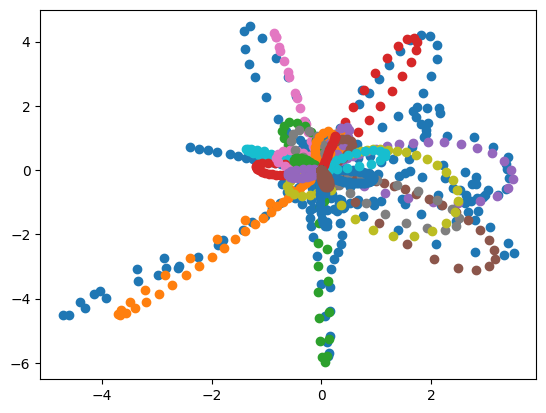

In [15]:
stroke_signals = [stroke.signal(signal.time) for stroke in out_plan.strokes]

plot_velocities([signal,*stroke_signals])

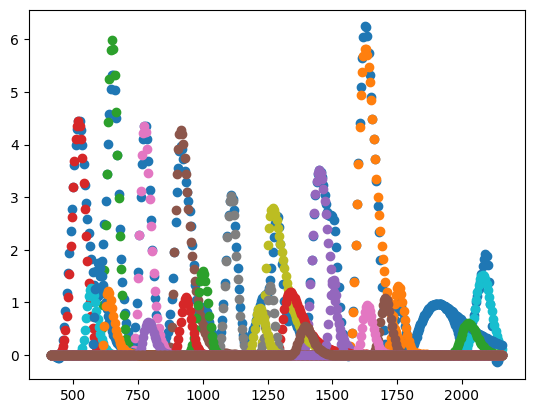

In [16]:
plot_speeds([signal,*stroke_signals])

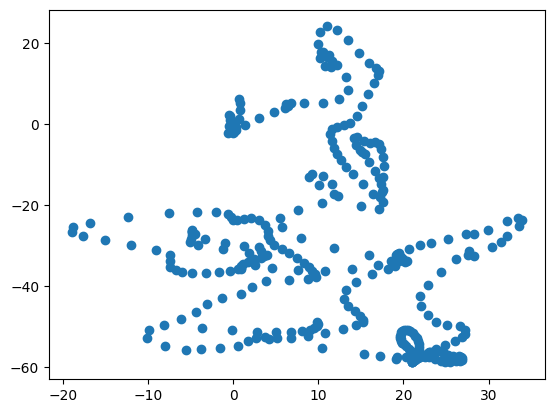

In [17]:
plot_signals([signal - out_signal])

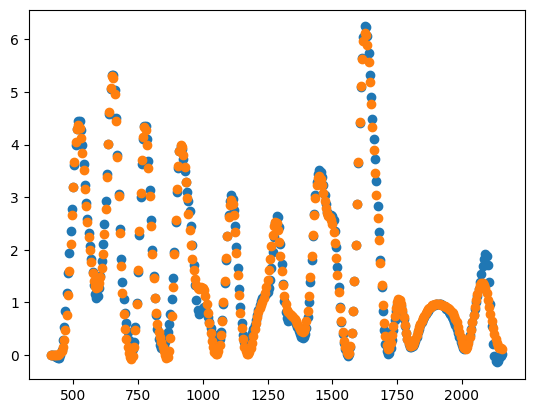

In [18]:
plot_speeds([signal,out_signal])